In [74]:
import pandas as pd
import numpy as np
import PyComplexHeatmap as pch
from PyComplexHeatmap import *
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
# Read in methods table 
grn_data = pd.read_csv("/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/grn_methods.tsv", sep="\t")

In [89]:
# Order alphabetically by "Method" column
grn_data = grn_data.sort_values(by="Method")

# Replace "Yes" with True and "No" with False
grn_data = grn_data.replace("Yes", True)
grn_data = grn_data.replace("No", False)

In [113]:
# Add column for "Category" of method
grn_data["Category"] = "GRN Inference"
#topic_data["Category"] = "Topic Modeling"

# Concatenate dataframes
data = pd.concat([grn_data])

In [114]:
qualitative_vars = ["Code quality", "Documentation quality", "Scalability"]

In [115]:
df_row = data.Method.to_frame()
df_row["Avg Rank"] = data[qualitative_vars].mean(axis=1)
df_row["Category"] = data.Category
df_row.head()

,Method,Avg Rank,Category
0,ARACNe,5.666667,GRN Inference
1,CellOracle,1.000000,GRN Inference
2,GENIE3,5.333333,GRN Inference
3,GRNBoost2,3.666667,GRN Inference
4,SCENIC,3.333333,GRN Inference


In [116]:
# Make it a long-form dataframe
rank_data = data[["Method", "Category"] + qualitative_vars]
rank_data = pd.melt(rank_data, id_vars=["Method", "Category"], var_name="Metric", value_name="Score")
rank_data.head()

,Method,Category,Metric,Score
0,ARACNe,GRN Inference,Code quality,6
1,CellOracle,GRN Inference,Code quality,1
2,GENIE3,GRN Inference,Code quality,5
3,GRNBoost2,GRN Inference,Code quality,4
4,SCENIC,GRN Inference,Code quality,3


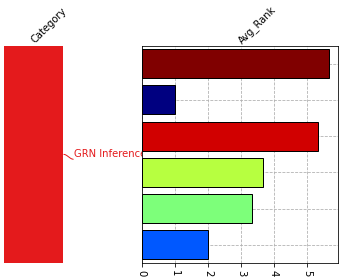

In [148]:
rank_data

,Method,Category,Metric,Score
0,ARACNe,GRN Inference,Code quality,6
1,CellOracle,GRN Inference,Code quality,1
2,GENIE3,GRN Inference,Code quality,5
3,GRNBoost2,GRN Inference,Code quality,4
4,SCENIC,GRN Inference,Code quality,3
5,WGCNA,GRN Inference,Code quality,2
6,ARACNe,GRN Inference,Documentation quality,6
7,CellOracle,GRN Inference,Documentation quality,1
8,GENIE3,GRN Inference,Documentation quality,5
9,GRNBoost2,GRN Inference,Documentation quality,4


Starting plotting HeatmapAnnotations


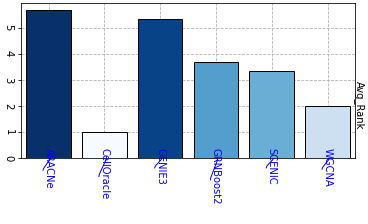

In [211]:
row_ha = HeatmapAnnotation(
    Avg_Rank=anno_barplot(df_row["Avg Rank"], legend=False, cmap="Blues"),
    selected=anno_label(df_row, colors='blue', relpos=(-0.05,0.4)),
    axis=0,
    verbose=5,
    plot=True,
    orientation="right",
    label="Avg Rank",
)

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..


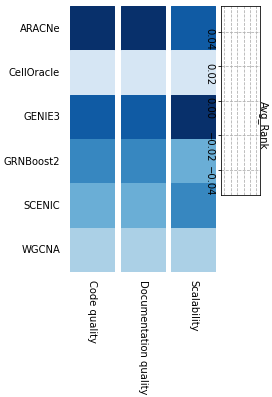

In [212]:
plt.figure(figsize=(3.5, 5))
row_ha = HeatmapAnnotation(
    Avg_Rank=anno_barplot(df_row["Avg Rank"], legend=False, cmap="Blues"),
    #selected=anno_label(df_row, colors='blue', relpos=(-0.05,0.4)),
    axis=0,
    verbose=5,
    plot=True
)

cm = DotClustermapPlotter(
    data=rank_data,
    x='Metric',
    y='Method',
    value='Score',
    c='Score',
    s=1,
    marker='s',
    cmap='Blues',
    col_cluster=False,
    row_cluster=False,
    right_annotation=row_ha,
    vmin=0,
    vmax=6,
    show_rownames=True,
    show_colnames=True,
    verbose=5,
    legend=False
)
cm.ax_heatmap.grid(which='minor', color='white', linestyle='--', alpha=0.6, linewidth=1)
plt.show()

In [210]:
DotClustermapPlotter?

Init signature:
DotClustermapPlotter(
    data=None,
    x=None,
    y=None,
    value=None,
    hue=None,
    s=None,
    c=None,
    marker='o',
    alpha=0.8,
    color_legend_kws={},
    cmap_legend_kws={},
    dot_legend_kws={},
    aggfunc=<function mean at 0x1555500754c0>,
    value_na=0,
    hue_na='NA',
    s_na=0,
    c_na=0,
    spines=False,
    **kwargs,
)
Docstring:     
DotClustermap (Heatmap) plotter, inherited from ClusterMapPlotter.
Plot dot heatmap (clustermap) with annotation and legends.

Parameters
----------
data : dataframe
    pandas dataframe or numpy array.
x: str
    The column name in data.columns to be shown on the columns of heatmap / clustermap.
y : str
    The column name in data.columns to be shown on the rows of heatmap / clustermap.
value : str
    The column name in data.columns to control the sizes, or color of scatter (dot).
hue : str, optional.
    The column name in data.columns to control the color, cmap, markers of scatter (dot).
s : str or in